In [3]:
# Inspiration
# https://www.scicoding.com/introduction-to-wavelet-transform-using-python/
# https://paos.colorado.edu/research/wavelets/bams_79_01_0061.pdf

import numpy as np
import matplotlib.pyplot as plt
import pywt
import wavio

w = wavio.read("data/LmicX-14-04-33.wav")
print(f'{w.data = }')
print(f'{len(w.data) = }')
print(f'{w.rate = }')
print(f'{w.sampwidth = }')

F = w.rate

w.data = array([[-7798],
       [-7784],
       [-7758],
       ...,
       [ 6104],
       [    0],
       [    0]], dtype=int16)
len(w.data) = 42649924
w.rate = 44100
w.sampwidth = 2


c:\dev\drons\venv\Lib\site-packages\pywt\_cwt.py:121: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


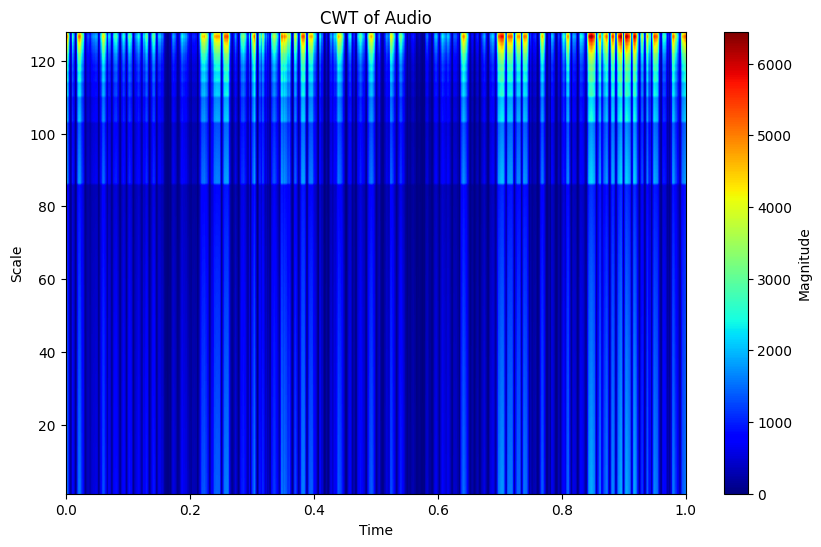

In [31]:
signal = w.data[18*F:18*F+20000]

coefficients, frequencies = pywt.cwt(signal, scales=np.arange(1, 128), wavelet='cmor')

plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[0, 1, 1, 128])
plt.colorbar(label="Magnitude")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title("CWT of Audio")
plt.show()

c:\dev\drons\venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


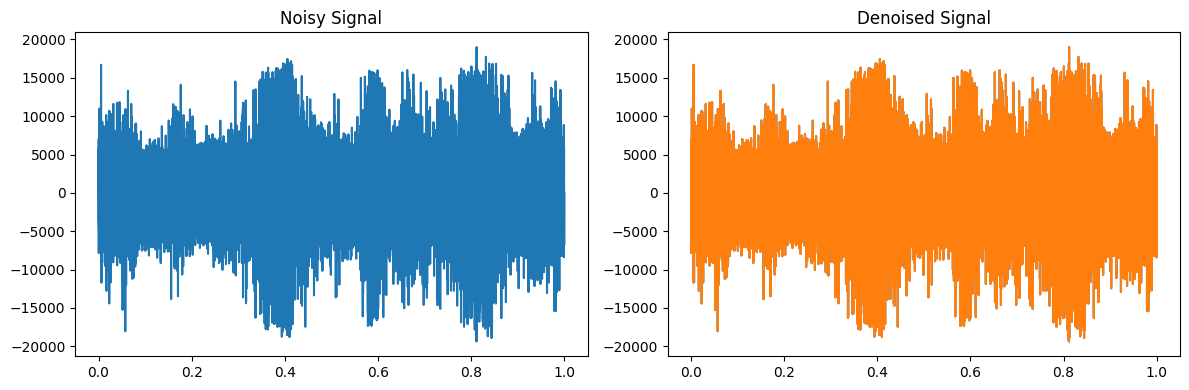

c:\dev\drons\venv\Lib\site-packages\wavio.py:259: ClippedDataWarning: Some data values have been clipped.  With scale=1.0, the interval of input values that will not be clipped is [-1.0000305180437934, 1.0]
  _warnings.warn(ClippedDataWarning(msg))


In [5]:
noisy_signal = w.data[:1000000]
t = np.linspace(0, 1, 1000000, endpoint=False)

# Perform a multi-level wavelet decomposition
coeffs = pywt.wavedec(noisy_signal, 'db1', level=4)

# Set a threshold to nullify smaller coefficients (assumed to be noise)
threshold = 0.5
coeffs_thresholded = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

# Reconstruct the signal from the thresholded coefficients
denoised_signal = pywt.waverec(coeffs_thresholded, 'db1')

# Plotting the noisy and denoised signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, noisy_signal)
plt.title("Noisy Signal")
plt.subplot(1, 2, 2)
plt.plot(t, denoised_signal)
plt.title("Denoised Signal")
plt.tight_layout()
plt.show()

wavio.write("data/out.wav", denoised_signal, rate=F, sampwidth=2)

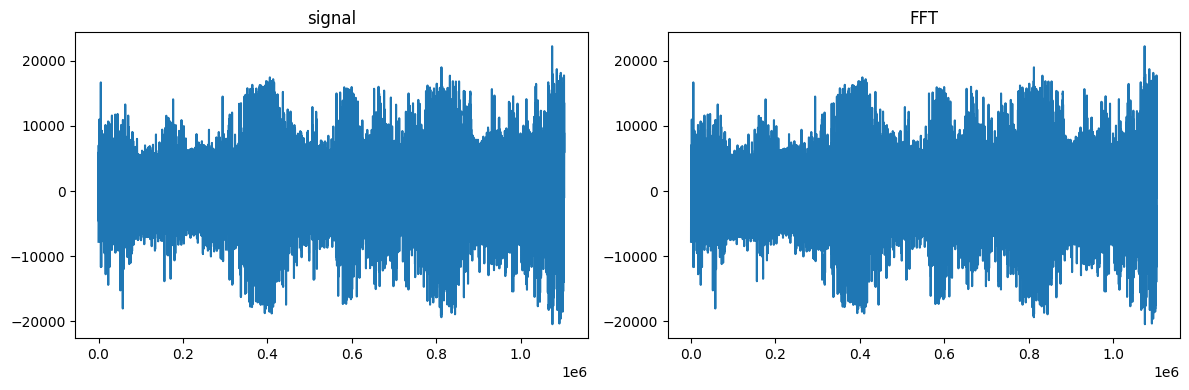

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

N = F * 25
T = 1.0 / F

noisy_signal = w.data[:N]
yf = scipy.fftpack.fft(noisy_signal)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(noisy_signal)
plt.title("signal")
plt.subplot(1, 2, 2)
plt.plot(yf)
plt.title("FFT")
plt.tight_layout()
plt.show()